In [1]:
import pandas as pd
from datasets import Dataset
import matplotlib.pyplot as plt
from statistics import mean, stdev
from rlhfutils.dataproc import getfrac
from rlhfutils.data import webgpt_template

/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
origdata = Dataset.load_from_disk("../../data/bagofwords/bowsynth250k//")

In [3]:
tmp = origdata.filter(lambda ex: ex['magnitude']>0)

Loading cached processed dataset at /scratch/cluster/prasanns/research/rlhf-length-biases/data/bagofwords/bowsynth250k/cache-4709cad9cf51738e.arrow


In [4]:
# getfrac(tmp, 100000).save_to_disk("../../data/bagofwords/nozero100k")

In [5]:
def rev_labels(ex):
    tk = ex['response_k']
    ex['response_k'] = ex['response_j']
    ex['response_j'] = tk
    return ex
# getfrac(origdata.map(rev_labels, num_proc=10), 100000).save_to_disk("../../data/bagofwords/bowreversedata")

In [22]:
sftouts = pd.read_json("../../outputs/math/genouts/mathsftinitial_sft1300.results")

(array([ 5.,  6., 23., 38., 63., 29., 22.,  6.,  2.,  4.]),
 array([1.90828924, 2.2050543 , 2.50181936, 2.79858442, 3.09534948,
        3.39211455, 3.68887961, 3.98564467, 4.28240973, 4.57917479,
        4.87593985]),
 <BarContainer object of 10 artists>)

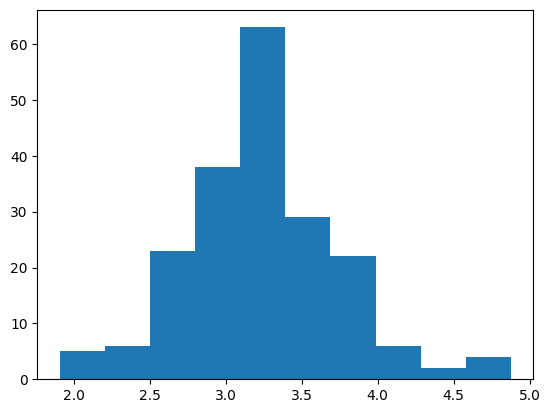

In [23]:
plt.hist([s[0] for s in sftouts['notruncval']])

In [34]:
# get a truncated version of origdata
truncdata = origdata.filter(lambda ex: ex['score_k']==0)
# truncdata.save_to_disk("../../data/bagofwords/bowmax2")

Loading cached processed dataset at /scratch/cluster/prasanns/research/rlhf-length-biases/data/bagofwords/bowsynth250k/cache-34b3535238d14273.arrow


In [6]:
# make an SFT dataset out of dispreferred data to get our "smallsft". TODO this might not work? Can always try "reversed" version of dataset with dpo too
def disprefsft(ex):
    ex['outputs'] = webgpt_template(ex['question'], ex['response_k'])
    return ex
truncsft = truncdata.map(disprefsft, num_proc=10)
# truncsft.save_to_disk("../../data/bagofwords/truncsftdata")

Loading cached processed dataset at /scratch/cluster/prasanns/research/rlhf-length-biases/data/bagofwords/bowsynth250k/cache-ab4ce88d2713ce2e_*_of_00010.arrow


In [7]:
# getfrac(truncsft, 100000).save_to_disk("../../data/bagofwords/truncsftdatav2")

(array([498.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

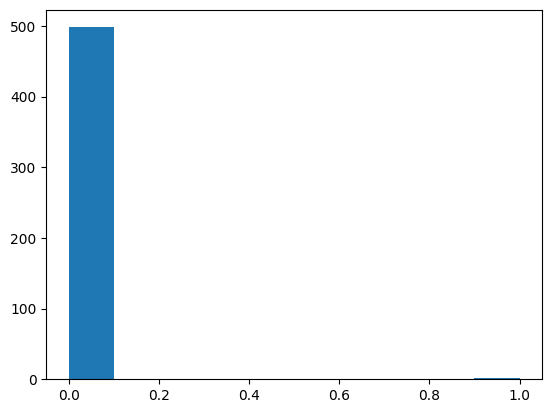

In [11]:
plt.hist([min(m) for m in sftouts['truncval']])

(array([3.7663e+04, 3.0200e+04, 1.6681e+04, 8.6630e+03, 4.3190e+03,
        1.7300e+03, 5.6000e+02, 1.4900e+02, 3.4000e+01, 1.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

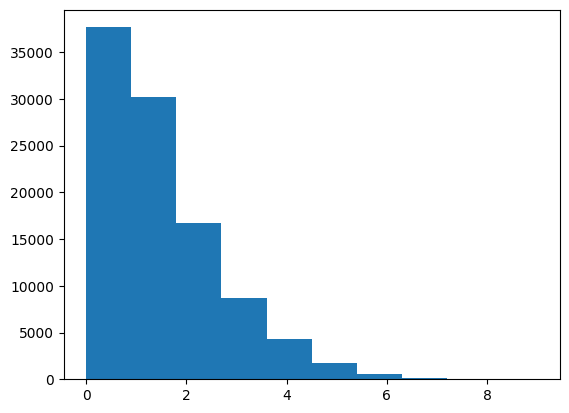

In [8]:
plt.hist(origdata['magnitude'])